# Lab 9 – Transforms

## 1: Data Transforms
- Use CPU only for this part

In [ ]:
import torch
import torchvision.transforms as transforms

### Download an image from its URL

--2022-05-03 15:45:29--  https://www.seedsavers.org/site/img/seo-images/0306-zulu-prince-daisy-flower.jpg
Resolving www.seedsavers.org (www.seedsavers.org)... 23.12.147.6, 23.12.147.52
Connecting to www.seedsavers.org (www.seedsavers.org)|23.12.147.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32579 (32K) [image/jpeg]
Saving to: ‘0306-zulu-prince-daisy-flower.jpg’

0306-zulu-prince-da 100%[===================>]  31.82K  --.-KB/s    in 0.001s  

2022-05-03 15:45:29 (21.1 MB/s) - ‘0306-zulu-prince-daisy-flower.jpg’ saved [32579/32579]



(500, 500)

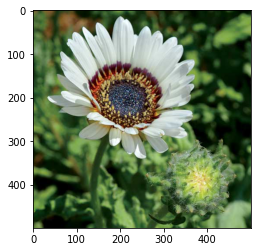

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Download a file from the internet
!wget https://www.seedsavers.org/site/img/seo-images/0306-zulu-prince-daisy-flower.jpg

# Rename it
!mv 0306-zulu-prince-daisy-flower.jpg my_pic.jpg

#  Alternately you could save it with a different name when downloading (same as last two lines)
# !wget https://www.seedsavers.org/site/img/seo-images/0306-zulu-prince-daisy-flower.jpg -O my_pic.jpg

img = Image.open("./my_pic.jpg")
plt.imshow(img)
img.size

### Tensor Transform

torch.Size([3, 500, 500])
tensor([[[0.3686, 0.3686, 0.3608,  ..., 0.0000, 0.0078, 0.0118],
         [0.3804, 0.3804, 0.3765,  ..., 0.0000, 0.0078, 0.0118],
         [0.3961, 0.3961, 0.3961,  ..., 0.0000, 0.0078, 0.0118],
         ...,
         [0.2784, 0.2941, 0.3216,  ..., 0.0431, 0.0471, 0.0510],
         [0.2941, 0.3059, 0.3294,  ..., 0.0431, 0.0392, 0.0353],
         [0.3059, 0.3176, 0.3373,  ..., 0.0392, 0.0314, 0.0235]],

        [[0.3608, 0.3490, 0.3333,  ..., 0.0706, 0.0784, 0.0824],
         [0.3725, 0.3608, 0.3490,  ..., 0.0706, 0.0784, 0.0824],
         [0.3922, 0.3843, 0.3765,  ..., 0.0745, 0.0824, 0.0863],
         ...,
         [0.4196, 0.4353, 0.4627,  ..., 0.1216, 0.1255, 0.1294],
         [0.4353, 0.4471, 0.4706,  ..., 0.1216, 0.1176, 0.1137],
         [0.4471, 0.4588, 0.4784,  ..., 0.1176, 0.1098, 0.1020]],

        [[0.1373, 0.1333, 0.1216,  ..., 0.0157, 0.0235, 0.0275],
         [0.1490, 0.1451, 0.1373,  ..., 0.0078, 0.0157, 0.0196],
         [0.1686, 0.1686, 0.1608

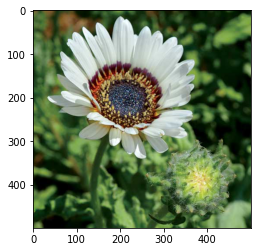

In [ ]:
trans = transforms.ToTensor()

img_tensor = trans(img)
print(img_tensor.shape)

print(img_tensor)
plt.imshow( img_tensor.permute(1, 2, 0))


### Resizing
- If images are of different sizes, this would help to standardize their sizes before passing into a NN which expects fixed-sized inputs

(384, 256)


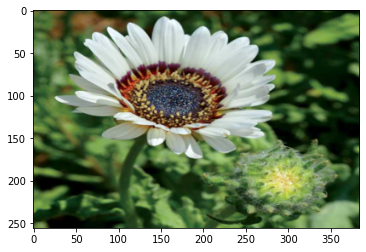

In [ ]:
# Resize to 256 x 384
trans = transforms.Resize((256, 384))

resized = trans(img)

plt.imshow(resized)
print(resized.size)

### Grayscale
- Convert colour images to black and white

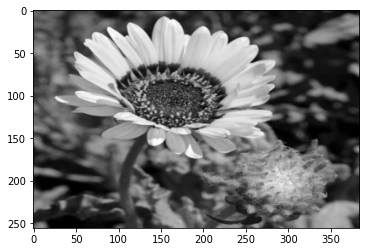

In [ ]:
trans = transforms.Grayscale()

gray = trans(resized)

plt.imshow(gray, cmap='gray')

### Random Grayscale
- supply a probability with which grayscale should be applied
- run this code several times, e.g. 5. The number of times the image appears as grayscale should be proportionate to the probability supplied (if p=0.2, then there transformed image should be grayscale approximately 1 in 5 times)

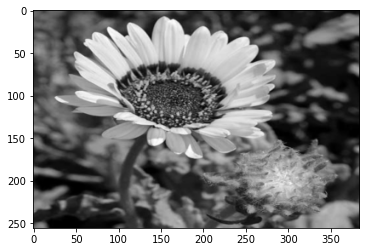

In [ ]:
trans = transforms.RandomGrayscale(p=0.5)

rgray = trans(resized)

plt.imshow(rgray)

### Centre Cropping
- crop at the centre of the image

(150, 100)


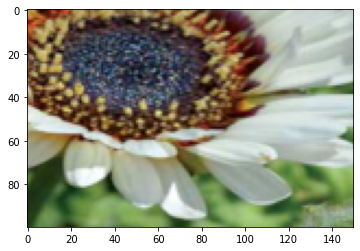

In [ ]:
trans = transforms.CenterCrop((100, 150))

ccropped = trans(resized)

print(ccropped.size)
plt.imshow(ccropped)

### Random Cropping
- Extract random patches from your image with given size
- Run this code cell several times to see different patches

(80, 80)


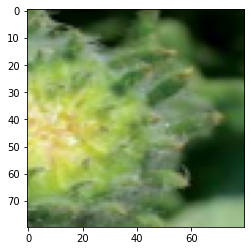

In [ ]:
# trans = transforms.RandomCrop((100, 100), padding=30, padding_mode='reflect')
trans = transforms.RandomCrop((80,80))

rcropped = trans(resized)

print(rcropped.size)
plt.imshow(rcropped)

### Random Resized Crop
- Crop a random size of the original size and a random aspect ratio of the original aspect ratio is made. This crop is finally resized to the given size
- Random crops of scaled versions of the image
- Run the code cell several times to see how this works
- Note that sometimes the flower is scaled differently to its original size

(80, 80)


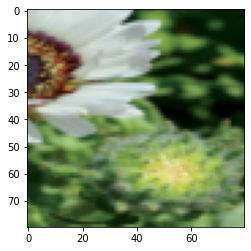

In [ ]:
trans = transforms.RandomResizedCrop((80,80))

rrcropped = trans(resized)

print(rrcropped.size)
plt.imshow(rrcropped)

### Add Colour Jitter
- randomly change brightness, contrast, saturation or hue of an image

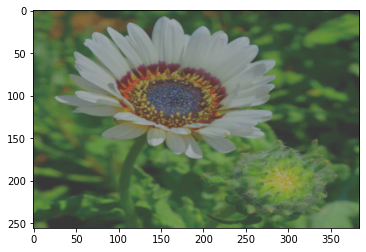

In [ ]:
import numpy as np

trans = transforms.ColorJitter(
    brightness=0,
    contrast=3,
    saturation=6,
    hue=0.3)

jittered = trans(resized)

plt.imshow(jittered)

### Random Vertical Flip

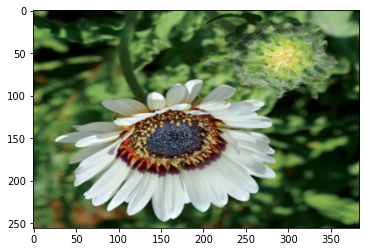

In [ ]:
trans = transforms.RandomVerticalFlip(p=0.5) # probability between 0 and 1

vflipped = trans(resized)

plt.imshow(vflipped)

### Random Horizontal Flip

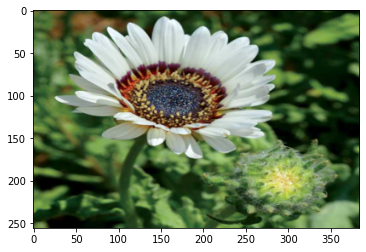

In [ ]:
trans = transforms.RandomHorizontalFlip(p=0.5) # probability between 0 and 1

hflipped = trans(resized)

plt.imshow(hflipped)

### Random Rotation
- if only one argument is supplied it randomly rotate from - that angle to + that angle (in degrees)
- if a tuple is supplied, then it will randomly rotate between those those angles

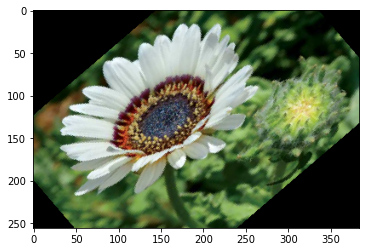

In [ ]:
# trans = transforms.RandomRotation(degrees=(30,60), center=(40, 70))

trans = transforms.RandomRotation(degrees=(60))

rotated = trans(resized)

plt.imshow(rotated)

### Random Affine (scaling, rotations, translation (shifting), and/or shearing)
- Format: `transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)`
- Allows you to specify random affine translations of the image (scaling, rotations, translations, and/or shearing, or any combination)
- Rotation, `degrees` is either a single float or int or a tuple. In single form, it produces random rotations between `(–degrees, degrees)`. With a tuple, it will produce random rotations between `(min, max)`. **MUST be provided.**
- Shifting, `translate` is a tuple of two multipliers `(horizontal_multipler, vertical_multiplier)`. At transform time, a horizontal shift, `dx`, is sampled in the range `–image_width × horizontal_multiplier < dx < image_width × horizontal_multiplier`, and a vertical shift is sampled in the same way with respect to the image height and the vertical multiplier.
- Scaling, `scale` is handled by another tuple, `(min, max)`, and a uniform scaling factor is randomly sampled from those.
- Shearing, `shear` can be either a single float/int or a tuple, and randomly samples in the same manner as the degrees parameter.
- Resample, `resample` allows you to optionally provide a PIL resampling filter, and `fillcolor` is an optional int specifying a fill color for areas inside the final image that lie outside the final transform.

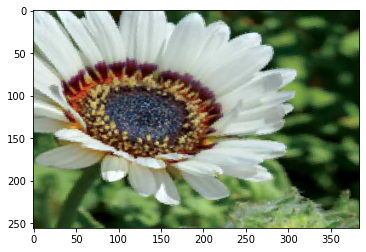

In [ ]:
trans = transforms.RandomAffine(degrees=10,
                                translate=(0.2, 0.3),
                                scale=(0.5, 1.5))

affine = trans(resized)

plt.imshow(affine)

### Perform a few Transforms
The following are applied in order
- Resize a PIL image to `(<height>, 256)`, where `<height>` is the value that maintains the aspect ratio of the input image.
- Crop the (200, 200) centre pixels.
- Convert the PIL image to a PyTorch tensor (which also moves the channel dimension to the beginning). C x H x W
- Normalize the image by subtracting a known mean and standard deviation (e.g. taken from ImageNet)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 200, 200])


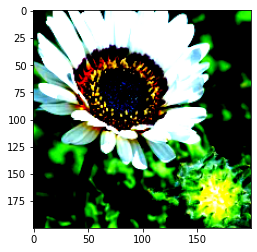

In [ ]:
import torchvision.transforms as T

preprocess = T.Compose([
   T.Resize(256), # if the width of your image is smaller than 256, select a smaller number
   T.CenterCrop(200), # this value should be smaller than the value in Resize()
   T.ToTensor(),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])

img_tensor = preprocess(img)
print(img_tensor.shape)

plt.imshow(  img_tensor.permute(1, 2, 0)  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


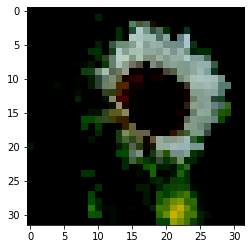

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.RandomGrayscale(0.3),
    transforms.RandomAffine(degrees=60, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])


img_tensor = preprocess(img)
print(img_tensor.shape)

plt.imshow( img_tensor.permute(1, 2, 0)  )

## Exercise
- Go to https://developers.google.com/speed/webp/gallery
- Right click on any image that you see (png, jpg, webp) and get its url by selecting "Copy image address"
- When you paste (`Ctrl-V`) onto your code cell, the image URL should be displayed
- Use `wget` to download this image and save it as `my_pic.jpg/png/webp` (file extension should be the same as the file type)
- You could also search for images in `pixabay.com` and get their url by right clicking on the image and selecting "Copy image address". Any other image from a URL is fine too.
- **Display this image and perform some transformations on it.**
- **Inspect the image and think of good transformations for this image. Display the transformed image(s) too.**
- <font color='blue'>**TIP: Do this when your neural network is training in Part 2.**</font>


--2022-05-03 15:46:36--  https://www.gstatic.com/webp/gallery/4.sm.jpg
Resolving www.gstatic.com (www.gstatic.com)... 172.217.13.227, 2607:f8b0:4004:c0b::5e
Connecting to www.gstatic.com (www.gstatic.com)|172.217.13.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24906 (24K) [image/jpeg]
Saving to: ‘4.sm.jpg’

4.sm.jpg            100%[===================>]  24.32K  --.-KB/s    in 0s      

2022-05-03 15:46:36 (93.7 MB/s) - ‘4.sm.jpg’ saved [24906/24906]



(320, 241)

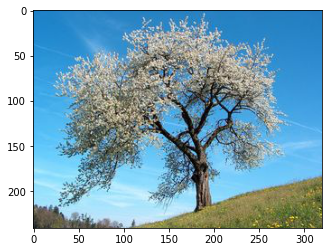

In [ ]:
# ENTER YOUR CODE HERE
!wget https://www.gstatic.com/webp/gallery/4.sm.jpg
!mv 4.sm.jpg my_pic.jpg

image = Image.open("./my_pic.jpg")
plt.imshow(image)
image.size

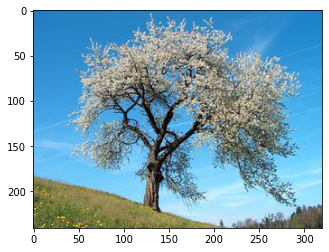

In [ ]:
trans = transforms.RandomHorizontalFlip(p=1)
hflipped = trans(image)
plt.imshow(hflipped)

(100, 100)


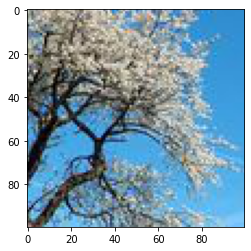

In [ ]:
trans = transforms.RandomCrop((100,100))

rcropped = trans(image)

print(rcropped.size)
plt.imshow(rcropped)

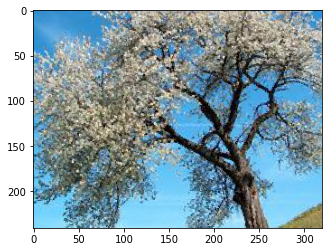

In [ ]:
trans = transforms.RandomAffine(degrees=20,
                                translate=(0.1, 0.1),
                                scale=(1.5, 1.5))

affine = trans(image)

plt.imshow(affine)

## 2. Application: CIFAR-10 with Transformations
- Specify a set of transformations for the training set and test set separately
- Image transformations (rotation, rescaling, etc.) are only applied to the training set and work on PIL Images
- Normalisation work on tensors, so convert a PIL image to tensor first
- Save model parameters in a state_dict and reload them
- Evaluate the model on the test data using the reloaded model parameters
- **Connect to GPU** (CPU will be too slow)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

# 0. Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# 1. Hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001
weight_decay = 0.001

# 3 Transforms
train_transforms = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(10),     # Randomly rotates the image to a specified angle
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                ])

test_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])


train_set = torchvision.datasets.CIFAR10("./", train=True,
                                         download=True,
                                         transform=train_transforms)
test_set = torchvision.datasets.CIFAR10("./", train=False,
                                        download=True,
                                        transform=test_transforms)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cuda


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


### Visualise a few normalised transformed images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 32, 32])
tensor([8, 8, 7, 0])
class labels: tensor([8, 8, 7, 0])


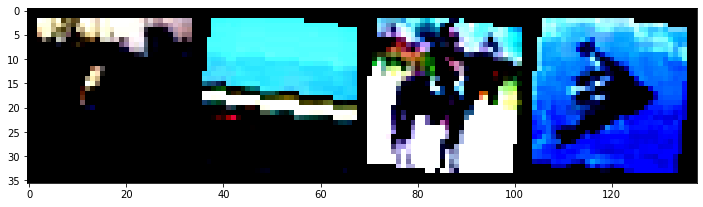

In [ ]:
batch = next(iter(train_loader))

images, labels = batch

print(images.shape)
print(labels)

# Create a grid
plt.figure(figsize=(12,12))
grid = torchvision.utils.make_grid(tensor=images, nrow=4) # nrow = number of images displayed in each row

print(f"class labels: {labels}")

# Use grid.permute() to transpose the grid so that the axes meet the specifications required by
# plt.imshow(), which are [height, width, channels]. PyTorch dimensions are [channels, height, width].
plt.imshow(grid.permute(1,2,0))

### View a few transormed images (without normalisation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


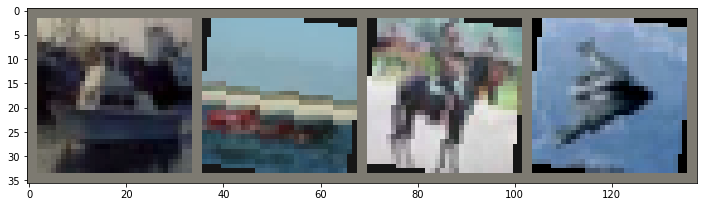

	ship 	ship 	horse 	plane


In [ ]:
# Inverse the normalisation
def inverse_normalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

def imshow(img):
    img = inverse_normalize(tensor=img, mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))
    npimg = img.numpy()
    plt.figure(figsize=(12,12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('\t{}'.format(classes[labels[j]]) for j in range(batch_size)))


### Define NN Class using CNN Layers
- Use `nn.Sequential()` to put multiple layers into a sequential block
- Just define one name per block, don't need to define name for each specific layer
- Layers are separated by comma
- In `forward()`, input and output are called on the `nn.Sequential()` layer, making things easier
- Added batchnorm and dropouts


In [ ]:
class CIFAR_CNN(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # FC layer block
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)

        # flatten to 2-D tensor x.size(0) returns first dimension (batch size)
        x = x.view(x.size(0), -1) # Could also use x.reshape()

        # fc layer
        x = self.fc_layer(x)

        return x



### Create NN Model, Loss and Optimiser
- Create model instance, loss and optimiser
- Added `weight_decay`

In [ ]:
model = CIFAR_CNN().to(device)

# Loss and Optimiser
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

### Training Loop
- takes around 20 minutes

In [ ]:
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division
print(f'Total steps: {n_total_steps}')
print(f'Iterations per epoch: {n_iterations}')

for epoch in range(num_epochs):
  print("\n")
  for i, (images, labels) in enumerate(train_loader):
    model.train() # For Dropout and Batch Norm layers

    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward pass and Optimise
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')


Total steps: 50000
Iterations per epoch: 12500


Epoch 1/4, Iteration 1000/12500, Loss=2.4702 
Epoch 1/4, Iteration 2000/12500, Loss=1.9401 
Epoch 1/4, Iteration 3000/12500, Loss=2.3697 
Epoch 1/4, Iteration 4000/12500, Loss=1.3554 
Epoch 1/4, Iteration 5000/12500, Loss=2.1053 
Epoch 1/4, Iteration 6000/12500, Loss=1.5179 
Epoch 1/4, Iteration 7000/12500, Loss=1.6440 
Epoch 1/4, Iteration 8000/12500, Loss=2.2858 
Epoch 1/4, Iteration 9000/12500, Loss=2.3269 
Epoch 1/4, Iteration 10000/12500, Loss=1.5610 
Epoch 1/4, Iteration 11000/12500, Loss=1.9583 
Epoch 1/4, Iteration 12000/12500, Loss=1.5969 


Epoch 2/4, Iteration 1000/12500, Loss=1.1030 
Epoch 2/4, Iteration 2000/12500, Loss=1.1967 
Epoch 2/4, Iteration 3000/12500, Loss=1.7703 
Epoch 2/4, Iteration 4000/12500, Loss=2.4258 
Epoch 2/4, Iteration 5000/12500, Loss=1.5670 
Epoch 2/4, Iteration 6000/12500, Loss=1.4055 
Epoch 2/4, Iteration 7000/12500, Loss=1.7619 
Epoch 2/4, Iteration 8000/12500, Loss=1.4051 
Epoch 2/4, Iteration 9000/

### Save the Trained Model
- specify the path where you want this file to be saved

In [ ]:
PATH = './cifar_cnn_model.pth'
torch.save(model.state_dict(), PATH)
# Check that "cifar_cnn_model.pth" is in the current directory
# Click folder icon on the leftmost menu to see the folder content or !ls -al

### Reload the Saved Model

In [ ]:
model0 = CIFAR_CNN().to(device)
model0.load_state_dict(torch.load(PATH))
model0.eval()

CIFAR_CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): Conv2d(

### Evaluation (using the saved model)

In [ ]:
# Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  # BatchNorm and Dropouts not required for testing
  model.eval()
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model0(images)

    # Get predictions
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) # different to FFNN
    n_correct += (y_preds == labels).sum().item()

    # Keep track of each class
    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  # Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

Test Accuracy of the WHOLE CNN = 61.74 %
Accuracy of plane: 62.7 %
Accuracy of car: 64.1 %
Accuracy of bird: 49.8 %
Accuracy of cat: 52.1 %
Accuracy of deer: 41.6 %
Accuracy of dog: 39.6 %
Accuracy of frog: 64.2 %
Accuracy of horse: 82.6 %
Accuracy of ship: 84.3 %
Accuracy of truck: 76.4 %


### Note: Remember NOT to leave your Notebook idle for long. Run some code cells or change Runtime to None (CPU) when done with Part 2.